In [1]:
from knowknow import *

In [2]:
from params import *

In [5]:
dball = Dataset(f'{ident}-wos-all')

loading variable anthro-wos-all/groups from disk


In [7]:
db2 = Dataset(f'{ident}-wos-journalFilter')

loading variable anthro-wos-journalFilter/_attributes from disk
loading variable anthro-wos-journalFilter/groups from disk
loading variable anthro-wos-journalFilter/group_reps from disk


In [8]:
db = Dataset(f'{ident}-wos-clean')

loading variable anthro-wos-clean/_attributes from disk
loading variable anthro-wos-clean/groups from disk
loading variable anthro-wos-clean/group_reps from disk


In [9]:
db.set_attribute('RELIABLE_DATA_STARTS_HERE', 1900)
db2.set_attribute('RELIABLE_DATA_STARTS_HERE', 1900)
dball.set_attribute('RELIABLE_DATA_STARTS_HERE', 1900)

# more uncategorized analysis

In [10]:
sorted(dball.items('c'))[:10]

loading variable anthro-wos-all/ind ___ c from disk


['"Dans, J.|garcon girls 1025 garcon girls 1025',
 '#Blacklivesmatter, O.|2016|11 maj misc black li',
 '#Jez3Prez, A.|2012|e misferica,v9',
 '\'"Redbones", A.|newsweek',
 "'Abbasi, I.|dawlat i pahlavi va",
 "'Abd, A.|abd as sahib dukhaiy",
 "'Abd, A.|falsafa al thawra",
 "'Abd, A.|nashwat al tarab fi",
 "'Abdi, I.|al sharq al aws 0612",
 "'Abdulrahman, M.|alakhbar       0125"]

In [11]:
cc_full = dball.by('c').docs

loading variable anthro-wos-all/doc ___ c from disk


In [12]:
#cc = db.by('c').cits
cc = None

In [62]:
num1 = sum([1 for x,c in cc_full.items() if c == 1])
num2 = sum([1 for x,c in cc_full.items() if c in [2,3,4]])
num3 = sum([1 for x,c in cc_full.items() if c >= 5])

total = sum([1 for x,c in cc_full.items() if c >= 1])
total2 = sum(db2.by('fy').docs.values())
total3 = len(db2.items('fj'))
total4 = sum([c for x,c in cc_full.items() if c >= 1])

c1 = num1/total
c2 = num2/total
c3 = num3/total

In [63]:
total,total2,total3,total4

(2271379, 60846, 42, 4588067)

In [64]:
c4 = sum([c for x,c in cc_full.items() if c >= 5]) / sum(cc_full.values())

In [65]:
sum( db2.by('fj').cits.values() )

2622663

In [66]:
sum( db.by('fj').cits.values() )

920049

In [67]:
first = min(yy for (yy,),c in db.by('fy').cits.items() if c>0)
last = max(yy for (yy,),c in db.by('fy').cits.items() if c>0)

In [70]:
display(Markdown(f"""

Within the {len(db.by('fj').cits)} {ident_written} journals which are indexed continuously by WoS (see Appendix B), 
    I have citations from {total2:,} articles published between {first} and {last}, 
    {total4 / 1e6:0.1f}M citations in all. 
Of the {total / 1e6:0.1f}M distinct cited works cited in these articles, 
    {c1:.0%} received only a single citation, 
    {c2:.0%} received between 2 and 4 citations, 
    and {c3:.0%} received at least 5 citations. 
However, {c4:.0%} of citations are to the {c3:.0%} of cited works which receive at least 5 citations. 
Typographic errors, alternate spellings, smudges of ink, and quirks of the algorithm 
    will register as a totally separate cited work, 
    so this number of once-cited works is an overestimate. 
But if it is even remotely accurate, 
    it shows that the relatively uncited get about as much attention as the relatively cited. 
    
In the rest of this paper I focus only on cited works that received at least 5 citations total, 
    disregarding the totally ignored. 
"""))



Within the 43 anthropology journals which are indexed continuously by WoS (see Appendix B), 
    I have citations from 60,846 articles published between 1901 and 2022, 
    4.6M citations in all. 
Of the 2.3M distinct cited works cited in these articles, 
    76% received only a single citation, 
    18% received between 2 and 4 citations, 
    and 6% received at least 5 citations. 
However, 41% of citations are to the 6% of cited works which receive at least 5 citations. 
Typographic errors, alternate spellings, smudges of ink, and quirks of the algorithm 
    will register as a totally separate cited work, 
    so this number of once-cited works is an overestimate. 
But if it is even remotely accurate, 
    it shows that the relatively uncited get about as much attention as the relatively cited. 
    
In the rest of this paper I focus only on cited works that received at least 5 citations total, 
    disregarding the totally ignored. 


In [71]:
#display(Markdown("""
"""
Of the {total:,} distinct cited works cited in {total2:,} Sociology articles in the chosen {total3:,} sociology journals,
    {c1:.0%} ({num1:,}) received only a single citation,
    {c2:.0%} ({num2:,}) received between 2 and 4 citations,
    and {c3:.0%} ({num3:,}) received at least 5 citations.
{c4:.0%} of the citations are to the {c3:.0%} which receive at least 5 citations.
This is an underestimate, as typographic errors, alternate spellings, smudges of ink, and quirks of the algorithm 
    will register as a totally separate cited work.
But if it's even remotely accurate, it shows that the relatively *uncited* get about as much attention as the relatively *cited*.
In this section I focus on the *cited* (discarding any works with less than 5 citations total).
This discards errors and one-offs.
Typographical errors and nonstandard spellings are excluded unless these become relatively common in this context.
And we consider only the references which have any substantive life to speak of.
The following analysis is on the {num5:,} remaining cited works.
""";
#""".format(**locals())))

/tmp/ipykernel_7686/2568122689.py:3: RuntimeWarning: divide by zero encountered in log
  plt.plot(yrs, np.log([c[(y,)] for y in yrs]));


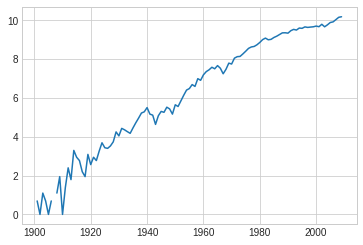

In [72]:
c = db.by('fy').cits
yrs = range(1900,2010,1)
plt.plot(yrs, np.log([c[(y,)] for y in yrs]));

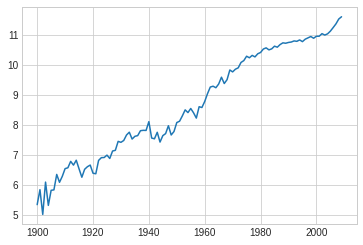

In [73]:
c = dball.by('fy').cits
yrs = range(1900,2010,1)
plt.plot(yrs, np.log([c[(y,)] for y in yrs]));

# summary before filtering

In [74]:
min_y = min(yy for (yy,),c in db.by('fy').cits.items() if c>0)
max_y = max(yy for (yy,),c in db.by('fy').cits.items() if c>0)

In [75]:
c1 = sum( dball.by('fy').docs.values() )
c2 = len( list(dball.by('fj').docs) )
c3 = len( list(db.by('fj').docs) )

Nclim = sum( c for (j,),c in dball.by('fj').cits.items() if j in set(db.items('fj')) )
Ndlim = sum( c for (j,),c in dball.by('fj').docs.items() if j in set(db.items('fj')) )

In [77]:
citN = sum( db.by('fj').cits.values() )
citN_m = citN / 1e6
docN = sum( db.by('fj').docs.values() )

njournals = len(db.items('fj'))

Web of Science provides a shortened version of each cited work, which attempts to generalize over reference formats, including references made in the body of the article or in footnotes, 
    as most were before broad citation format standardization in the late 1960s and early 1970s.
Their method of shortening has changed over time, and smudges of ink or typographical errors made by authors result in inconsistencies.
I use a grouping algorithm to identify identical references and combine them. See Appendix for details.

In [79]:
display(Markdown("""
(unused)
As of April 2020, there were {c1:,} journal articles indexed by Web of Science in the category "{wos_cat}," distributed across {c2:,} journals.
I limit my focus here to the journals which consistently publish {ident_written} articles with references Web of Science is able to extract.
I also exclude journals which were founded after 1995 or which end before 2015.
This leaves {c3:,} journals, containing {Ndlim:,} articles published between {min_y} and {max_y}, and {Nclim:,} total citations.
""".format(**locals())))


(unused)
As of April 2020, there were 115,019 journal articles indexed by Web of Science in the category "Anthropology," distributed across 210 journals.
I limit my focus here to the journals which consistently publish anthropology articles with references Web of Science is able to extract.
I also exclude journals which were founded after 1995 or which end before 2015.
This leaves 43 journals, containing 68,295 articles published between 1901 and 2022, and 2,967,683 total citations.


In [80]:
wauthAve = sum( db.by('fa').docs.values() ) / docN
cauthAve = sum( db.by('ta').docs.values() ) / docN
cworkAve = sum( db.by('c').docs.values() ) / docN

In [81]:
cN = len(db.items('c'))
faN = len(db.items('fa'))
ffaN = len(db.items('ffa'))
taN = len(db.items('ta'))

In [82]:
display(Markdown("""
(unused) After filtering journals with incomplete or limited data, 
    grouping cited reference strings by their textual similarity, 
    and ignoring cited works which receive less than five citations total, 
    I was left with {docN:,} journal articles and {citN_m:0.1f}M citations. 
Across all articles, 
    there are on average {wauthAve:0.2f} writing authors, 
        {cauthAve:0.2f} cited authors, 
        and {cworkAve:0.2f} cited works. 
In total there were 
    {cN:,} cited works, 
    {taN:,} cited authors, and 
    {faN:,} writing authors 
    ({ffaN:,} first authors). 
""".format(**locals())))


(unused) After filtering journals with incomplete or limited data, 
    grouping cited reference strings by their textual similarity, 
    and ignoring cited works which receive less than five citations total, 
    I was left with 62,477 journal articles and 0.9M citations. 
Across all articles, 
    there are on average 2.40 writing authors, 
        12.12 cited authors, 
        and 14.63 cited works. 
In total there were 
    56,401 cited works, 
    20,983 cited authors, and 
    60,444 writing authors 
    (30,179 first authors). 


In [83]:
c = db.by('fj').cits
d = db.by('fj').docs
jmax = max(db.items('fj'), key=lambda x:c[(x,)]/d[(x,)])
jmin = min(db.items('fj'), key=lambda x:c[(x,)]/d[(x,)])

In [84]:
st_ave = db(fj=jmax).cits / db(fj=jmax).docs
soc_ave = db(fj=jmin).cits / db(fj=jmin).docs

In [85]:
top5 = sorted( db.items('fj'), key=lambda x: -db(fj=x).cits )[:5]

In [86]:
top5str = ["*{}* ({})".format(x.title(), db(fj=x).cits) for x in top5]
top5str = ", ".join(top5str[:-1]) + ", and " + top5str[-1]
top5prop = sum( db(fj=x).cits for x in top5 ) / sum( db(fj=x).cits for x in db.items('fj') )
top5propd = sum( db(fj=x).docs for x in top5 ) / sum( db(fj=x).docs for x in db.items('fj') )

In [87]:
display(Markdown(f"""
*{jmax.title()}* produces the most citations per article, at {st_ave:0.1f}. 
Meanwhile *{jmin.title()}* produces just {soc_ave:0.1f} citations per article. 
Web of Science provides the most citations for the journals {top5str}. 
Together these five journals comprise {top5prop:0.0%} of all citations ({top5propd:0.0%} of documents) in this dataset.
"""))


*Journal Of Anthropological Archaeology* produces the most citations per article, at 32.5. 
Meanwhile *Race & Class* produces just 2.9 citations per article. 
Web of Science provides the most citations for the journals *American Journal Of Physical Anthropology* (118574), *Journal Of Human Evolution* (95386), *Journal Of Archaeological Science* (93944), *Current Anthropology* (49098), and *American Anthropologist* (38429). 
Together these five journals comprise 43% of all citations (32% of documents) in this dataset.


In [88]:
st = sorted( db2.items('fj'), key=lambda x: -db(fj=x).docs )
#st = [x for x in st if x not in {'sociologia'}]
top_N = st[0]
top_Ny = db2(fj=top_N, fy=2020).docs
bot_N = st[-1]
bot_Ny = db2(fj=bot_N, fy=2020).docs

In [89]:
display(Markdown(f"*{top_N.title()}* published {top_Ny} papers in 2020, while *{bot_N.title()}* published just {bot_Ny}"))

*Journal Of Archaeological Science* published 124 papers in 2020, while *Journal Of World Prehistory* published just 11

In [90]:
d50 = sum( db(fy=YY).docs for YY in range(1950,1960) )
c50 = sum( db(fy=YY).cits for YY in range(1950,1960) )
cd50 = c50/d50
j50 = len(set( fj for (fj,fy),c in db.by('fj','fy').cits.items() if c > 0 and fy in range(1950,1960) ))


d00 = sum( db(fy=YY).docs for YY in range(2000,2010) )
c00 = sum( db(fy=YY).cits for YY in range(2000,2010) )
cd00 = c00/d00
j00 = len(set( fj for (fj,fy),c in db.by('fj','fy').cits.items() if c > 0 and fy in range(2000,2010) ))

d2019 = db(fy=2019).docs

In [91]:
display(Markdown("""
(unused) Only {d50:,} articles were published in {j50:,} journals from 1950-1959 ({cd50:0.1f} citations per article),
    compared to {d00:,} articles in {j00:,} journals from 2000-2009 ({cd00:0.1f} citations per article).
In 2019 alone there were {d2019:,} articles published.
""".format(**locals())))


(unused) Only 1,109 articles were published in 9 journals from 1950-1959 (5.6 citations per article),
    compared to 12,278 articles in 43 journals from 2000-2009 (16.1 citations per article).
In 2019 alone there were 1,823 articles published.


# citing authors

In [92]:
fc = db.by('fa').docs

num1 = len(db.items('fa'))
num2 = len([_ for (a,),c in fc.items() if c == 1])
p2 = num2 / num1

an = sorted(fc.items(), key=lambda x:-x[1])
an = an[:10]
def transa(x):
    (x,),c = x
    x = x.split(", ")
    return (x[1]+". "+x[0]).title() + " (%s)"%c
an = [transa(x) for x in an]
an = ", ".join(an[:-1]) + " and " + an[-1]

In [93]:
len([y for y in fc.values() if y>20])

614

In [94]:
num3 = len([_ for (a,),c in fc.items() if c >20])
num4 = len([_ for (a,),c in fc.items() if c >40])

In [96]:
display(Markdown("""
Of the {num1:,} authors who published in this context, {num2:,} only published a single time ({p2:0.0%}).
{num3:,} authors have published more than 20 papers, and just {num4:,} published more than 40.
The top ten publishing first authors are {an}.
""".format(**locals())))


Of the 60,444 authors who published in this context, 37,406 only published a single time (62%).
614 authors have published more than 20 papers, and just 105 published more than 40.
The top ten publishing first authors are R. Malina (170), F. Salzano (137), M. Richards (111), E. Trinkaus (105), J. Hublin (101), M. Crawford (101), W. Leonard (89), S. Mays (88), C. Ruff (86) and J. Arsuaga (82).


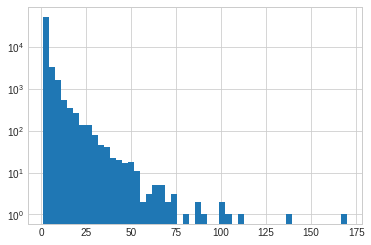

In [97]:
plt.hist(fc.values(), bins=50);
plt.yscale('log')

# cited authors

In [98]:
fc = db.by('ta').docs

num1 = len(db.items('ta'))
num2 = len([_ for (a,),c in fc.items() if c == 5])
p2 = num2 / num1

an = sorted(fc.items(), key=lambda x:-x[1])
an = an[:20]
def transa(x):
    (x,),c = x
    x = x.split(", ")
    return (x[1]+" "+x[0]).title() + " (%s citations)"%c
    #return (x[1]+" "+x[0]).title() + " ({:,} citations)".format(c)
an = [transa(x) for x in an]
an = ", ".join(an[:-1]) + " and " + an[-1]

In [99]:
num3 = len([_ for (a,),c in fc.items() if c >100])
p3 = num3/num1
num4 = len([_ for (a,),c in fc.items() if c >1000])
p4 = num4/num1

In [100]:
display(Markdown("""
I have already filtered cited works with less than five citations, so all {num1:,} cited authors in this dataset have at least five citations.
Of these, {num2:,} ({p2:0.0%}) were cited less than 10 times, {num3:,} ({p3:0.0%}) were cited at least 100 times and {num4} were cited at least 1000 times in this dataset.
The top authors cited in this dataset were {an}.
""".format(**locals())))


I have already filtered cited works with less than five citations, so all 20,983 cited authors in this dataset have at least five citations.
Of these, 1,922 (9%) were cited less than 10 times, 1,529 (7%) were cited at least 100 times and 18 were cited at least 1000 times in this dataset.
The top authors cited in this dataset were L. Binford (1962 citations), P. Bourdieu (1943 citations), M. Foucault (1776 citations), C. Geertz (1680 citations), J. Tanner (1467 citations), M. Sahlins (1330 citations), J. Scott (1313 citations), C. Lovejoy (1268 citations), A. Appadurai (1244 citations), C. Levi-Strauss (1189 citations), J. Comaroff (1081 citations), C. Ruff (1070 citations), T. White (1063 citations), R. Sokal (1058 citations), V. Turner (1028 citations), R. Martin (1023 citations), M. Strathern (1018 citations), B. Smith (1017 citations), E. Wolf (959 citations) and E. Trinkaus (956 citations).


# cited works

In [101]:
fc = db.by('c').docs

num1 = len(db.items('c'))
num2 = len([_ for (a,),c in fc.items() if c == 5])
p2 = num2 / num1

an = sorted(fc.items(), key=lambda x:-x[1])
an = an[:10]
def transa(x):
    (x,),c = x
    x = x.split("|")
    if len(x)==2:
        a,w = x
        #return ("%s (??)"%a).title() + " (%s citations)"%c
    elif len(x)==3:
        a,y,w = x
        #return ("%s (%s)"%(a,y)).title() + " (%s citations)"%c
    print (a, "-", w)
    a = a.split(",")[0]
    a = a.title()
    a = a+"'s"
    
    w = w.title()
    return ("%s *%s* (%s)"%(a,w,c))
    #return (x[1]+" "+x[0]).title() + " ({:,} citations)".format(c)
an = [transa(x) for x in an]
an = ", ".join(an[:-1]) + " and " + an[-1]

Bourdieu, P. - outline theory pract
Anderson, B. - imagined communities
Sokal, R. - biometry
Geertz, C. - interpretation cultu,v5019
Ortner, D. - identification patho
Foucault, M. - discipline punish bi
Lovejoy, C. - am j phys anthropol,v68,p15
Binford, L. - bones ancient men mo
Mauss, M. - gift forms functions
Levi-Strauss, C. - elementary structure


In [102]:
num3 = len([_ for (a,),c in fc.items() if c >100])
p3 = num3/num1
num4 = len([_ for (a,),c in fc.items() if c >1000])
p4 = num4/num1

In [103]:
display(Markdown("""
All {num1:,} cited works in this dataset have at least five citations.
Of these, {num2:,} ({p2:0.0%}) were cited less than 10 times, {num3:,} ({p3:0.0%}) were cited at least 100 times and {num4} were cited at least 1000 times in this dataset.
The top cited works in this dataset were {an}.
""".format(**locals())))


All 56,401 cited works in this dataset have at least five citations.
Of these, 6,051 (11%) were cited less than 10 times, 557 (1%) were cited at least 100 times and 0 were cited at least 1000 times in this dataset.
The top cited works in this dataset were Bourdieu's *Outline Theory Pract* (956), Anderson's *Imagined Communities* (754), Sokal's *Biometry* (693), Geertz's *Interpretation Cultu,V5019* (596), Ortner's *Identification Patho* (571), Foucault's *Discipline Punish Bi* (569), Lovejoy's *Am J Phys Anthropol,V68,P15* (559), Binford's *Bones Ancient Men Mo* (504), Mauss's *Gift Forms Functions* (497) and Levi-Strauss's *Elementary Structure* (481).
